In [1]:
import numpy as np
from sklearn.metrics import accuracy_score
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.datasets import mnist
(x_train,y_train),(x_test,y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [3]:
print("X-train [Shape %s]sample patch: \n" % str(x_train.shape), x_train[1,15:20,5:10])
print("Y-train [Shape %s]sample patch: \n" % str(y_train.shape), y_train[1,15:20,5:10])

X-train [Shape (60000, 28, 28)]sample patch: 
 [[  0  76 246 252 112]
 [  0  85 252 230  25]
 [  0  85 252 223   0]
 [  0  85 252 145   0]
 [  0  86 253 225   0]]


IndexError: too many indices for array: array is 1-dimensional, but 3 were indexed

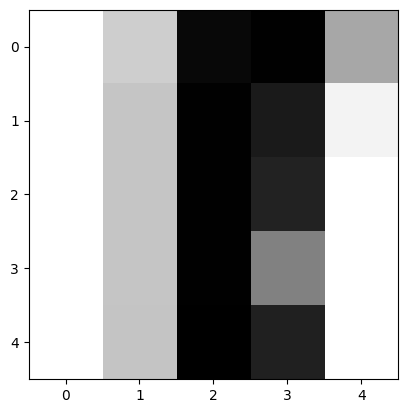

In [4]:
plt.imshow(x_train[1,15:20,5:10],cmap="Greys")
plt.show()

In [5]:
x_train = x_train.astype(np.float32) / 255.0
x_test = x_test.astype(np.float32) / 255.0


In [6]:
x_train = x_train.reshape((60000,28*28))
x_test = x_test.reshape((10000,28*28))
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

In [9]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(500, activation=tf.nn.sigmoid, input_shape=(28,28,1)),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

c:\Users\wifi\Desktop\Depi_Amit_BNS3\Depi_Amit_AI_BNS3\env\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 28, 28, 500)    │         1,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 28, 28, 10)     │         5,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,010 (23.48 KB)

 Trainable params: 6,010 (23.48 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
import tensorflow as tf
# Load and preprocess the MNIST dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

# Preprocess data (normalize)
X_train = X_train.astype('float32') / 255.0#min -max scaler
X_test = X_test.astype('float32') / 255.0

# Flatten the images (28x28 -> 784)
X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)

# One-hot encode labels
y_train_oh = tf.keras.utils.to_categorical(y_train, 10)
y_test_oh = tf.keras.utils.to_categorical(y_test, 10)

# Define a very simple model with inappropriate settings
model = tf.keras.Sequential([
    # Very few neurons and no hidden layers
    tf.keras.layers.Dense(500, activation='tanh', input_shape=(784,)), 
    tf.keras.layers.Dense(10, activation='softmax')
    # Output layer for classification
])
model.summary()
# Compile the model with an extremely high learning rate
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.5),  # High learning rate
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train for very few epochs
history = model.fit(X_train, y_train_oh, epochs=10, batch_size=64, validation_split=0.2)

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(X_test, y_test_oh)
print(f"Test accuracy: {test_acc}")

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 500)            │       392,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         5,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 397,510 (1.52 MB)

 Trainable params: 397,510 (1.52 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6405 - loss: 17.5789 - val_accuracy: 0.7191 - val_loss: 13.4249
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.6816 - loss: 18.5630 - val_accuracy: 0.6833 - val_loss: 21.1596
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6917 - loss: 18.4472 - val_accuracy: 0.7491 - val_loss: 14.6725
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.6988 - loss: 20.0463 - val_accuracy: 0.7399 - val_loss: 15.3643
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7226 - loss: 18.7387 - val_accuracy: 0.7965 - val_loss: 12.2904
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7260 - loss: 19.7593 - val_accuracy: 0.7757 - val_loss: 14.7576
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.7329 - loss: 20.4187 - val_accuracy: 0.7854 - val_loss: 16.2228
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.7414 - loss: 19.5007 - 